# Коцкање

Двајца играчи А и В имаат вкупно $N$ златници и играат игра во која во секој круг по неспецифициран случаен избор се одлучува кој од нив на другиот ќе му префрли еден од своите златници сé додека еден од играчите не "банкротира", по што играта е завршена.

1.  Играта да се претстави како случаен Марков процес, т.е. да се опише со транзициона матрица $P$.

2.  За $N=3$, да се пресмета стационарната распределба на веројатностите за Марковиот процес. Што може да се заклучи од резултатот?


Ако $N=3$ и ако победникот во секој круг се одлучува со фрлање на паричка:

3.  Кој има поголема веројатност да победи ако првиот играч почне со два златника? Кој има поголема веројатност да победи ако првиот играч почне со еден златник? Дали одговорот зависи од почетната распределба на златниците?

4.  Кое е очекуваното време за кое играта ќе заврши? Дали тоа зависи од почетната состојба на процесот?


## Решение

### Одговор на задача 1

*  Играта да се претстави како случаен Марков процес, т.е. да се опише со транзициона матрица $P$.

Со веројатност $q$ играчот A дава еден златник на играчот B. Со веројатност $1-q$ играчот B дава еден златник на играчот A. Една состојба $S$ е опишана преку соодветна распределба на златиниците помеѓу играчите.
 
*  $S_1 : A = N, B=0$
*  $S_2 : A = N-1, B=1$
*  $S_3 : A = N-2, B=2$
*  $S_4 : A = N-3, B=3$
*  $S_{N-3} : A = 3, B=N-3$
*  $S_{N-2} : A = 2, B=N-2$
*  $S_{N-1} : A = 1, B=N-1$
*  $S_N : A = 0, B=N$

Веригата ја градиме така што за секоја состојба ги пресметуваме наредните состојби. Тука спаѓаат случаите играчот A да даде еден златник на играчот B со веројатност $q$ и играчот B да даде еден златник на играчот A со веројатност $1-q$.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pydtmc as mc

Матрицата $P$ можеме генерално да ја запишеме преку променливата `q`.

In [2]:
states = np.array(['S_1', 'S_2', 'S_3', 'S_4'])
p_general = pd.DataFrame([[1, 0, 0, 0], ['q', 0, '1-q', 0], [0, 'q', 0, '1-q'], [0, 0, 0, 1]], columns=states, index=states)
p_general

S_1 S_2  S_3  S_4
S_1   1   0    0    0
S_2   q   0  1-q    0
S_3   0   q    0  1-q
S_4   0   0    0    1

А потоа да ги замениме тие вредности откако ќе ја знаеме вредноста на $q$. Технички гледано, библиотеката pandas генералната променлива `q` ја води како стринг. Затоа ја заменуваме со соодветниот текстуален израз за вредноста на `q`, а на крај повикуваме функција која сите податоците во табелата ќе ги направи реални броеви.

In [3]:
q = 0.5
p = p_general.replace('q', str(q)).replace('1-q', str(1-q)).astype('float')
p

S_1  S_2  S_3  S_4
S_1  1.0  0.0  0.0  0.0
S_2  0.5  0.0  0.5  0.0
S_3  0.0  0.5  0.0  0.5
S_4  0.0  0.0  0.0  1.0


DISCRETE-TIME MARKOV CHAIN
 SIZE:         4
 CLASSES:      3
  - RECURRENT: 2
  - TRANSIENT: 1
 ABSORBING:    YES
 APERIODIC:    YES
 IRREDUCIBLE:  NO
 ERGODIC:      NO



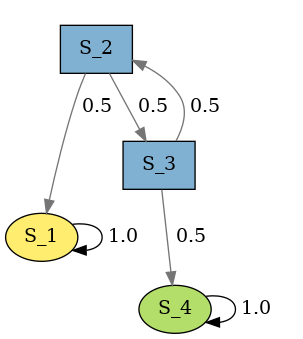

In [4]:
def draw_markov_chain(chain):
    plt.ioff()
    print(chain)
    fig, ax = mc.plot_graph(chain)
    ax.set_visible(False)
    plt.show()

chain = mc.MarkovChain(p, states)
draw_markov_chain(chain)

### Одговор на задача 2

*  За $N=3$, да се пресмета стационарната распределба на веројатностите за Марковиот процес. Што може да се заклучи од резултатот?

Лесно забележуваме дека оваа верига е апсорбирачка. Тоа значи дека ќе добиеме нерешлив систем линеарни равенки ако рачно ја бараме стационарната распределба. Библиотеката `pydtmc`, во случај на апсорбирачка Маркова верига, за стационарна распределба ќе врати листа од можни стационарни распределби каде секој елемент од таа листа кажува која е апсорбирачка состојба.

In [5]:
chain.pi

[array([1., 0., 0., 0.]), array([0., 0., 0., 1.])]

Истото го заклучуваме и на следниот поедноставен начин

In [6]:
chain.absorbing_states

['S_1', 'S_4']

### Одговор на задача 3

*  Кој има поголема веројатност да победи ако првиот играч почне со два златника?
*  Кој има поголема веројатност да победи ако првиот играч почне со еден златник?
*  Дали одговорот зависи од почетната распределба на златниците?


Победа на првиот играч, или играчот A, значи процесот да се апсорбира во состојбата $S_1$. 
*  Ако првиот играч почне со 2 златника, ќе почнеме од состојба $S_2$.
*  Ако првиот играч почне со 1 златник, ќе почнеме од состојба $S_3$.

Резултатите ги добиваме преку `absorption_probabilities`. 
*  Првата колона ја претставува веројатноста процесот да се апсорбира во состојбите $S_1$ и $S_4$ ако почнеме од состојба $S_2$.
*  Втората колона ја претставува веројатноста процесот да се апсорбира во состојбите $S_1$ и $S_4$ ако почнеме од состојба $S_3$.

Прашањата кои ни се поставени ја бараат веројатноста да победи првиот играч, па според изложеното на нас ни треба првата редица.

Очигледно дека стационарната распределба зависи од почетната распределба. Ова важи за апсорбирачките вериги.

In [7]:
chain.absorption_probabilities

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

### Одговор на задача 4

*  Кое е очекуваното време за кое играта ќе заврши? Дали тоа зависи од почетната состојба на процесот?

За да го определиме просечното време на една игра, ќе го определиме просечното време на достигнување до состојбите $S_1$ и $S_4$. Нормално за ова ја користиме функцијата `mean_first_passage_times_to()`, но бидејќи оваа верига е апсорбирачка, ќе ја искористиме функцијата `absorption_times`. Таа го кажува времете за кое процесот ќе заглави во апсорбирачка состојба, во зависност од почетната состојба.

In [8]:
t = chain.absorption_times
t

array([2., 2.])

*  Првата вредност е времето за кое процесот ќе се апсорбира во некоја апсорбирачка состојба ако почне од $S_2$.
*  Втората вредност е времето за кое процесот ќе се апсорбира во некоја апсорбирачка состојба ако почне од $S_3$.

Бидејќи пресметаните времиња се еднакви, резултатот не зависи од почетната распределба на златници. Доколку имавме случај овие вредности да се разлилни, времето на игра ќе зависеше од почетната распределба на златници.

Ако рачно ги правиме овие пресметки, ќе ја користиме равенката за време на достигнување. Во тој случај времињата $t_1$ и $t_4$, соодветно за состојбите $S_1$ и $S_4$, ќе ги поставиме да бидат еднакви на нула.